# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №2: Классификация текстовых данных

<hr\>
**Общая информация**

**Срок сдачи:** 19 апреля 2017, 23:59 <br\>

При отправлении ДЗ на почту `hse.minor.dm+2@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [ИАД-2] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [3]:
surname = u"Рогачевская" #Ваша фамилия

variant = (hash(surname.lower()) % 2 + 1)
print ("Ваш вариант - ", variant)



Ваш вариант -  1


<p><b>Варианты</b></p>

* Набор SMS сообщений (sms) - <b>спам/не спам</b> - <a href="https://archive.ics.uci.edu/ml/datasets">источник</a> - файл c данными: <b>data/SMSSpamCollection</b></li>
</ol>
* Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import time

In [5]:
df = pd.read_table('reviews.tsv', header=None, names=['ans', 'phrase']) #загружаем данные
df.head()

,ans,phrase
0,0,unless bob crane is someone of particular inte...
1,1,"finds a way to tell a simple story , perhaps t..."
2,0,"ill-considered , unholy hokum ."
3,0,"nijinsky says , 'i know how to suffer' and if ..."
4,1,the auteur's ear for the way fears and slights...


In [6]:
phrases = df.phrase.values

In [7]:
tf = TfidfVectorizer(lowercase=True, ngram_range=(1,1)) #переводим данные в векторный вид
vect = tf.fit_transform(phrases)

In [8]:
from sklearn.model_selection import train_test_split #разделяем данные
X_train, X_test, y_train, y_test = train_test_split(vect, df.ans.values, test_size=0.3, random_state = 123)

K-ближайших соседей:

In [9]:
from sklearn.neighbors import KNeighborsClassifier #обучение
knn = KNeighborsClassifier(n_neighbors=5)
start_fit_knn = time.time()
knn.fit(X_train, y_train)
end_fit_knn = time.time()
time_fit_knn = end_fit_knn - start_fit_knn
print(time_fit_knn)

start_pred_knn = time.time()
knn.predict(X_test)
end_pred_knn = time.time()
time_pred_knn = end_pred_knn - start_pred_knn
print(time_pred_knn)

0.013009071350097656
3.363393545150757


In [10]:
y_hat_knn = knn.predict(X_test)

In [11]:
accuracy_score(y_test, y_hat_knn) #определяем качество

0.71459831197249135

Логистическая регрессия:

In [12]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1.0, penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
start_fit_log = time.time()
log.fit(X_train, y_train)
end_fit_log = time.time()
time_fit_log = end_fit_log - start_fit_log
print(time_fit_log)

start_pred_log = time.time()
log.predict(X_test)
end_pred_log = time.time()
time_pred_log = end_pred_log - start_pred_log
print(time_pred_log)

1.6912035942077637
0.0030031204223632812


In [13]:
y_hat_log = log.predict(X_test)

In [14]:
accuracy_score(y_test, y_hat_log)

0.76242575804939039

Мультиномиальный наивный Байес:

In [15]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0)
start_fit_mnb = time.time()
mnb.fit(X_train, y_train)
end_fit_mnb = time.time()
time_fit_mnb = end_fit_mnb - start_fit_mnb
print(time_fit_mnb)

start_pred_mnb = time.time()
mnb.predict(X_test)
end_pred_mnb = time.time()
time_pred_mnb = end_pred_mnb - start_pred_mnb 
print(time_pred_mnb) 

#получилось, что модель с knn обучается быстрее log, но предсказания делает дольше остальных
#логистическая регрессия обучается медленнее всех, но предсказания делает почти с таким же временем, как mnb
#mnb лучшая по времени

0.022009849548339844
0.005002021789550781


In [16]:
y_hat_mnb = mnb.predict(X_test)

In [17]:
accuracy_score(y_test, y_hat_mnb)

#доля правильных ответов у MNB больше (очевидно, качество этой модели лучше), 
#затем идет LOG,а самая худшая accuracy соответственно у KNN

0.78149421694279464

## Задача 2.
#### Применение k-folds (3 балла)

<p>Повторите решение задачи 1, но с ипользованием k-folds (k=4) для разделения исходных данных, обучения и тестирования.</p>

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
right_answers = make_scorer(accuracy_score, greater_is_better = True)
kf = KFold(n_splits=4, random_state=123)

Для K ближайших соседей:

In [19]:
knn_2 = KNeighborsClassifier(n_neighbors=5)
start1_knn = time.time()
cross_val_score(estimator = knn_2, X = X_train, y = y_train, scoring = right_answers, cv=kf)
end1_knn = time.time()
time1_knn = end1_knn - start1_knn
print(time1_knn)

8.798261404037476


In [20]:
cv_knn_2 = cross_val_score(estimator = knn_2, X = X_train, y = y_train, scoring = right_answers, cv=kf)
sum(list(cv_knn_2))/4

0.69971926013407693

Для логистической регрессии:

In [21]:
log_2 = LogisticRegression(C=1.0, penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
start1_log = time.time()
cross_val_score(estimator = log_2, X = X_train, y = y_train, scoring = right_answers, cv=kf)
end1_log = time.time()
time1_log = end1_log - start1_log
print(time1_log)

2.4672493934631348


In [22]:
cv_log_2 = cross_val_score(estimator = log_2, X = X_train, y = y_train, scoring = right_answers, cv=kf  )
sum(list(cv_log_2))/4

0.74152608122203734

Для мультиномиального наивного Байеса:

In [23]:
mnb_2 = MultinomialNB(alpha=1.0)
start1_mnb = time.time()
cross_val_score(estimator = mnb_2, X = X_train, y = y_train, scoring = right_answers, cv=kf  )
end1_mnb = time.time()
time1_mnb = end1_mnb - start1_mnb
print(time1_mnb) #MNB снова работает быстрее всех

0.20714688301086426


In [24]:
cv_mnb_2 = cross_val_score(estimator = mnb_2, X = X_train, y = y_train, scoring = right_answers, cv=kf  )
sum(list(cv_mnb_2))/4

0.7585437445583304

## Задача 3.
#### Выбор модели (5 баллов)

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>

<p style="padding-left:15px;">3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации <br>
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать долю правильных классификаций)<br>
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
6. Повторите шаги 2-4 для n-gram=2<br>
7. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)
</p>

In [25]:
from sklearn.model_selection import GridSearchCV

<p>K-ближайших соседей</p>

In [26]:
ns = np.arange(1, 150, 20) 
knn_3 = KNeighborsClassifier(n_neighbors=list(ns))
param_dict_knn = {'n_neighbors':list(ns)}
grid_knn = GridSearchCV(estimator= knn_3, cv=kf, param_grid = param_dict_knn, scoring = right_answers)
grid_knn.fit(X_train, y_train)
error_test_knn = grid_knn.cv_results_.get('mean_test_score')
error_train_knn = grid_knn.cv_results_.get('mean_train_score')


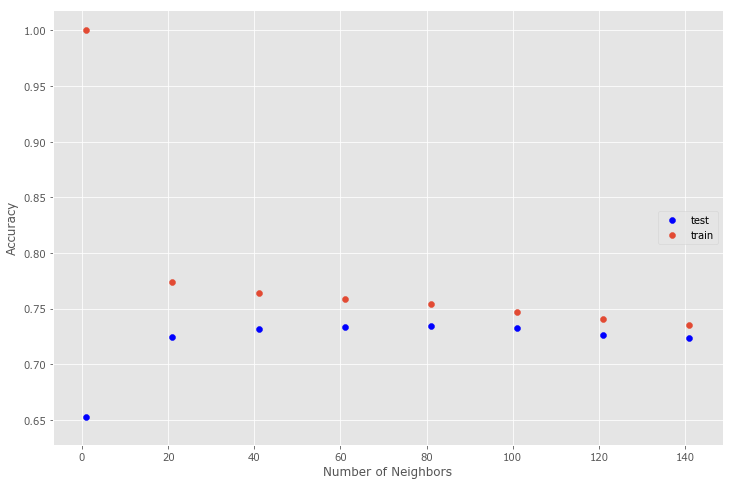

In [28]:
plt.scatter(list(ns), error_test_knn, c = 'blue', label='test')
plt.scatter(list(ns), error_train_knn, label='train')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc=5)

<p>Логистическая регрессия</p>

In [29]:
cs = np.logspace(-2, 10, 8, base=10)
log_3 = LogisticRegression(C=list(cs), penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
param_dict_log = {'C': list(cs)} 
grid_log = GridSearchCV(estimator=log_3, cv=kf, param_grid = param_dict_log, scoring = right_answers)
grid_log.fit(X_train, y_train)
error_test_log = grid_log.cv_results_.get('mean_test_score')
error_train_log = grid_log.cv_results_.get('mean_train_score')

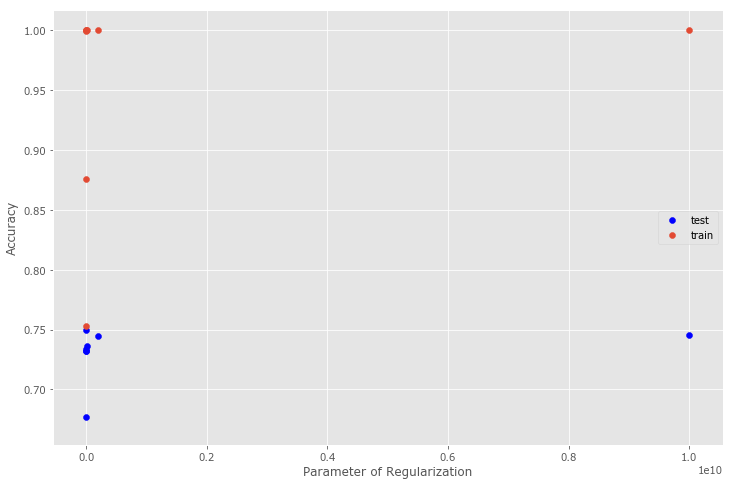

In [30]:
plt.scatter(list(cs), error_test_log, c = 'blue', label='test')
plt.scatter(list(cs), error_train_log, label='train')
plt.xlabel('Parameter of Regularization')
plt.ylabel('Accuracy')
plt.legend(loc=5)

<p>Мультиномиальный наивный Байес</p>

In [31]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр
mnb_3 = MultinomialNB(alpha=list(alphas))
param_dict_mnb = {'alpha': list(alphas)} 
grid_mnb = GridSearchCV(estimator=mnb_3, cv=kf, param_grid = param_dict_mnb, scoring = right_answers)
grid_mnb.fit(X_train, y_train)
error_test_mnb = grid_mnb.cv_results_.get('mean_test_score')
error_train_mnb = grid_mnb.cv_results_.get('mean_train_score')

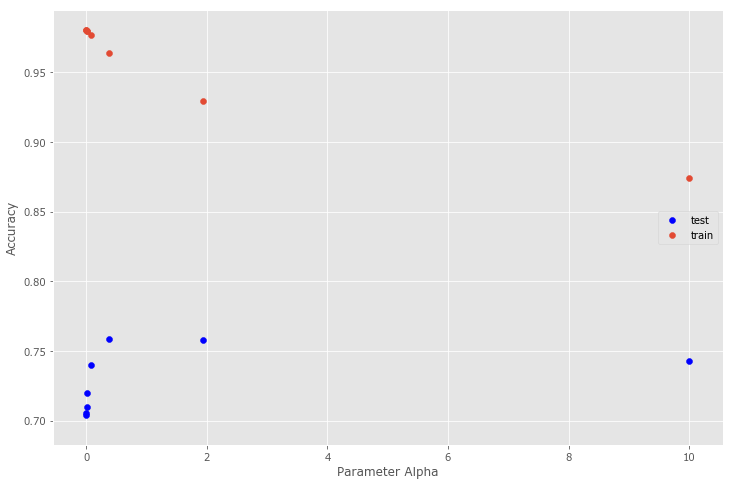

In [32]:
plt.scatter(list(alphas), error_test_mnb, label='test', c = 'blue')
plt.scatter(list(alphas), error_train_mnb, label= 'train')
plt.xlabel('Parameter Alpha')
plt.ylabel('Accuracy')
plt.legend(loc=5)

Ищем лучшие параметры для моделей:

K ближайших соседей:

In [33]:
grid_knn.best_params_

{'n_neighbors': 81}

Логистическая регрессия:

In [34]:
grid_log.best_params_

{'C': 26.826957952797247}

Мультиномиальный наивный Байес

In [35]:
grid_mnb.best_params_

{'alpha': 0.37275937203149417}

Обучение лучшей модели. К ближайших соседей

In [36]:
knn_4 = KNeighborsClassifier(n_neighbors=81)
start2_fit_knn = time.time()
knn_4.fit(X_train, y_train)
end2_fit_knn = time.time()
time2_fit_knn = end2_fit_knn - start2_fit_knn
print(time2_fit_knn)

start2_pred_knn = time.time()
knn_4.predict(X_test)
end2_pred_knn = time.time()
time2_pred_knn = end2_pred_knn - start2_pred_knn
print(time2_pred_knn)


0.009001493453979492
4.32207465171814


In [37]:
y_hat_knn_best = knn_4.predict(X_test)
score2_knn = accuracy_score(y_test, y_hat_knn_best)
score2_knn

0.75336042513285406

Обучение. Логистическая регрессия

In [38]:
log_4 = LogisticRegression(C=26.826957952797247, penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
start2_fit_log = time.time()
log_4.fit(X_train, y_train)
end2_fit_log = time.time()
time2_fit_log = end2_fit_log - start2_fit_log
print(time2_fit_log)

start2_pred_log = time.time()
log_4.predict(X_test)
end2_pred_log = time.time()
time2_pred_log = end2_pred_log - start2_pred_log
print(time2_pred_log)

1.2829129695892334
0.003007650375366211


In [39]:
y_hat_log_best = log_4.predict(X_test)
score2_log = accuracy_score(y_test, y_hat_log_best)
score2_log

0.76899030947170988

Обучение. Мультиномиальный наивный Байес

In [40]:
mnb_4 = MultinomialNB(alpha=0.37275937203149417)
start2_fit_mnb = time.time()
mnb_4.fit(X_train, y_train)
end2_fit_mnb = time.time()
time2_fit_mnb = end2_fit_mnb - start2_fit_mnb
print(time2_fit_mnb)

start2_pred_mnb = time.time()
mnb_4.predict(X_test)
end2_pred_mnb = time.time()
time2_pred_mnb = end2_pred_mnb - start2_pred_mnb
print(time2_pred_mnb)

0.012006759643554688
0.003001689910888672


In [41]:
y_hat_mnb_best = mnb_4.predict(X_test)
score2_mnb = accuracy_score(y_test, y_hat_mnb_best)
score2_mnb

0.77555486089402936

При n_grams = (2,2):

In [42]:
tf_2 = TfidfVectorizer(lowercase=True, ngram_range=(2,2))
vect_2 = tf_2.fit_transform(df.phrase.values)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(vect_2, df.ans.values, test_size=0.3, random_state = 123)

Для K ближайших соседей:

In [44]:
knn_5 = KNeighborsClassifier(n_neighbors=list(ns))
param_dict_knn = {'n_neighbors':list(ns)}
grid_knn2 = GridSearchCV(estimator= knn_5, cv=kf, param_grid = param_dict_knn, scoring = right_answers)
grid_knn2.fit(X_train_2, y_train_2)
error_test_knn2 = grid_knn2.cv_results_.get('mean_test_score')
error_train_knn2 = grid_knn2.cv_results_.get('mean_train_score')

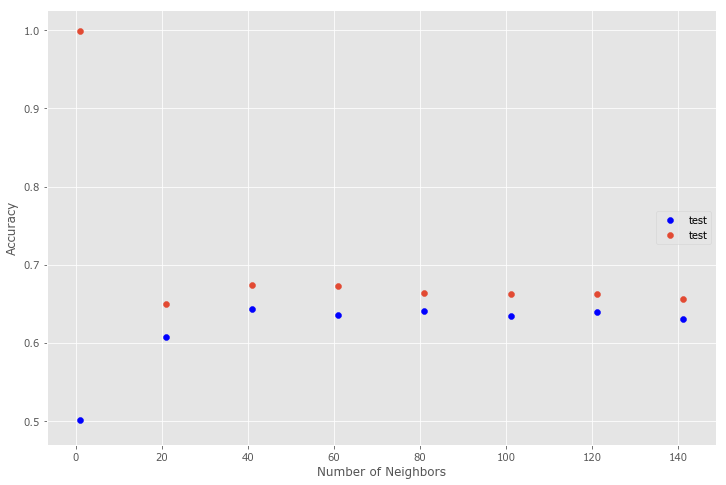

In [45]:
plt.scatter(list(ns), error_test_knn2, c= 'blue', label='test')
plt.scatter(list(ns), error_train_knn2, label='test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc=5)

In [46]:
grid_knn2.best_params_

{'n_neighbors': 41}

In [47]:
knn_6 = KNeighborsClassifier(n_neighbors=41)

start3_fit_knn = time.time()
knn_6.fit(X_train_2, y_train_2)
end3_fit_knn = time.time()
time3_fit_knn = end3_fit_knn - start3_fit_knn
print(time3_fit_knn)

start3_pred_knn = time.time()
knn_6.predict(X_test_2)
end3_pred_knn = time.time()
time3_pred_knn = end3_pred_knn - start3_pred_knn
print(time3_pred_knn)



0.009008407592773438
2.1555328369140625


In [48]:
y_hat_knn_best6 = knn_6.predict(X_test_2)
score3_knn = accuracy_score(y_test_2, y_hat_knn_best6)
score3_knn

0.64864020006251955

Для логистической регрессии:

In [49]:
log_5 = LogisticRegression(C=list(cs), penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
param_dict_log = {'C': list(cs)} 
grid_log2 = GridSearchCV(estimator=log_5, cv=kf, param_grid = param_dict_log, scoring = right_answers)
grid_log2.fit(X_train_2, y_train_2)

error_test_log2 = grid_log2.cv_results_.get('mean_test_score')
error_train_log2 = grid_log2.cv_results_.get('mean_train_score')

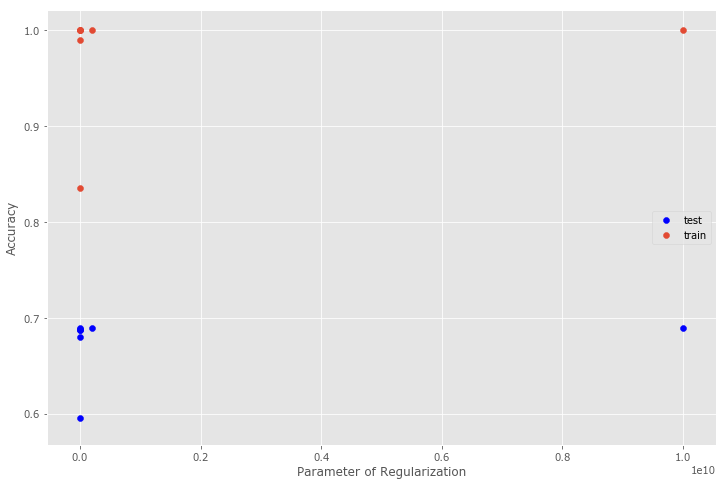

In [50]:
plt.scatter(list(cs), error_test_log2, c = 'blue', label = 'test')
plt.scatter(list(cs), error_train_log2, label = 'train')
plt.xlabel('Parameter of Regularization')
plt.ylabel('Accuracy')
plt.legend(loc=5)

In [51]:
grid_log2.best_params_

{'C': 193069772.88832456}

In [52]:
log_6 = LogisticRegression(C=193069772.88832456, penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
start3_fit_log = time.time()
log_6.fit(X_train_2, y_train_2)
end3_fit_log = time.time()
time3_fit_log = end3_fit_log - start3_fit_log
print(time3_fit_log)

start3_pred_log = time.time()
log_6.predict(X_test_2)
end3_pred_log = time.time()
time3_pred_log = end3_pred_log - start3_pred_log
print(time3_pred_log)


2.276120662689209
0.004999637603759766


In [53]:
y_hat_log_best = log_6.predict(X_test_2)
score3_log = accuracy_score(y_test_2, y_hat_log_best)
score3_log

0.70459518599562365

Для мультиномиального наивного Байеса:

In [54]:
mnb_5 = MultinomialNB(alpha=list(alphas))
param_dict_mnb = {'alpha': list(alphas)} 
grid_mnb2 = GridSearchCV(estimator=mnb_5, cv=kf, param_grid = param_dict_mnb, scoring = right_answers)
grid_mnb2.fit(X_train_2, y_train_2)
error_test_mnb2 = grid_mnb2.cv_results_.get('mean_test_score')
error_train_mnb2 = grid_mnb2.cv_results_.get('mean_train_score')

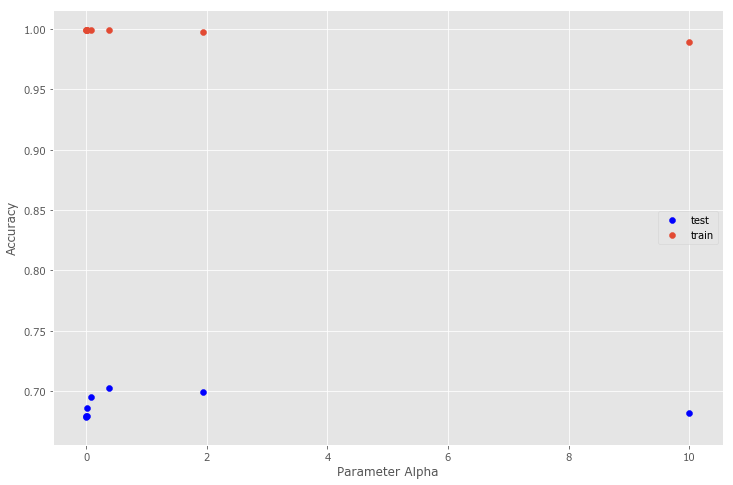

In [55]:
plt.scatter(list(alphas), error_test_mnb2, c='blue', label = 'test')
plt.scatter(list(alphas), error_train_mnb2, label = 'train')
plt.xlabel('Parameter Alpha')
plt.ylabel('Accuracy')
plt.legend(loc=5)

In [56]:
grid_mnb2.best_params_

{'alpha': 0.37275937203149417}

In [57]:
mnb_6 = MultinomialNB(alpha=0.37275937203149417)

start3_fit_mnb = time.time()
mnb_6.fit(X_train_2, y_train_2)
end3_fit_mnb = time.time()
time3_fit_mnb = end3_fit_mnb - start3_fit_mnb
print(time3_fit_mnb)

start3_pred_mnb = time.time()
mnb_6.predict(X_test_2)
end3_pred_mnb = time.time()
time3_pred_mnb = end3_pred_mnb - start3_pred_mnb
print(time3_pred_mnb)

0.03252410888671875
0.01147913932800293


In [58]:
y_hat_mnb_best = mnb_6.predict(X_test_2)
score3_mnb = accuracy_score(y_test_2, y_hat_mnb_best)
score3_mnb

0.71897467958737105

In [59]:
result = pd.DataFrame({"method":['knn', 'log', 'mnb', 'knn', 'log', 'mnb'], "ngrams" :[1, 1, 1, 2, 2, 2], "parameter" : 
                       ['81', '26.826957952797247', '0.37275937203149417', '41', '193069772.88832456',
                        '0.37275937203149417'], "time_fit": [time2_fit_knn, time2_fit_log, time2_fit_mnb, time3_fit_knn,
                        time3_fit_log, time3_fit_mnb], "time_pred": [time2_pred_knn, time2_pred_log, time2_pred_mnb, 
                                                                    time3_pred_knn, time3_pred_log, time3_pred_mnb],
                       "accuracy":[score2_knn, score2_log, score2_mnb, score3_knn, score3_log, score3_mnb]})
result

,accuracy,method,ngrams,parameter,time_fit,time_pred
0,0.753360,knn,1,81,0.009001,4.322075
1,0.768990,log,1,26.826957952797247,1.282913,0.003008
2,0.775555,mnb,1,0.37275937203149417,0.012007,0.003002
3,0.648640,knn,2,41,0.009008,2.155533
4,0.704595,log,2,193069772.88832456,2.276121,0.005000
5,0.718975,mnb,2,0.37275937203149417,0.032524,0.011479


In [60]:
#KNN быстро обучается (как такого обучения у метода и нет), но долго предсказывает и accuracy у него самая низкая.
#LOG долго обучается, но быстро делает предсказания, и доля правильных ответов выше, чем у KNN и достаточно близка к доле MNB 
#Но по сути быстрее всех (точнее имеет хорошее время и в обучении, и в предсказании) и с лучшим качеством работает MNB 

## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (5 баллов к сумме по всем ДЗ) 

<p>Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [76]:
n_feat = np.logspace(1, 5, 5, base=10)
n_feat = [int(x) for x in list(n_features)]# количество признаков
non_negative=True
n_feat

[10, 100, 1000, 10000, 100000]

<p>Можно воспользоваться GridSearchCV</p>

In [79]:
from sklearn.feature_extraction.text import HashingVectorizer
feat = HashingVectorizer(n_features = 10, non_negative=True)
features = feat.fit_transform(df.phrase.values)

In [80]:
X_train_3, X_test_3, y_train_3, y_test_3= train_test_split(features, df.ans.values, test_size=0.3, random_state = 123)

К ближайших соседей:

In [81]:
knn_hash = KNeighborsClassifier(n_neighbors=list(ns))
param_dict_knn = {'n_neighbors':list(ns)}
grid_knn3 = GridSearchCV(estimator= knn_hash, cv=kf, param_grid = param_dict_knn, scoring = right_answers)
grid_knn3.fit(X_train_3, y_train_3)
grid_knn2.best_params_

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1,
           n_neighbors=[1, 21, 41, 61, 81, 101, 121, 141], p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 21, 41, 61, 81, 101, 121, 141]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [84]:
knn_hash1 = KNeighborsClassifier(n_neighbors=41)
knn_hash1.fit(X_train_3, y_train_3)
y_hat_knn_hash1 = knn_hash1.predict(X_test_3)
accuracy_score(y_test_3, y_hat_knn_hash1)

0.4989059080962801

Логистическая регрессия:

In [88]:
log_hash = LogisticRegression(C=list(cs), penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
param_dict_log = {'C':list(cs)}
grid_log3 = GridSearchCV(estimator=log_hash, cv=kf, param_grid = param_dict_log, scoring = right_answers)
grid_log3.fit(X_train_3, y_train_3)
grid_log3.best_params_

{'C': 26.826957952797247}

In [90]:
log_hash1 = LogisticRegression(C=26.826957952797247, penalty="l2", fit_intercept=True, max_iter=100, solver="lbfgs", random_state=123)
log_hash1.fit(X_train_3, y_train_3)
y_hat_log_hash1 = log_hash1.predict(X_test_3)
accuracy_score(y_test_3, y_hat_log_hash1)

0.53297905595498596

Мультиномиальный наивный Байес

In [92]:
mnb_hash1 = MultinomialNB(alpha=list(alphas))
param_dict_mnb = {'alpha': list(alphas)} 
grid_mnb3 = GridSearchCV(estimator=mnb_hash1, cv=kf, param_grid = param_dict_mnb, scoring = right_answers)
grid_mnb3.fit(X_train_3, y_train_3)
grid_mnb3.best_params_

{'alpha': 0.0001}

In [93]:
mnb_hash1 = MultinomialNB(alpha=0.0001)
mnb_hash1.fit(X_train_3, y_train_3)
y_hat_mnb_hash1 = mnb_hash1.predict(X_test_3)
accuracy_score(y_test_3, y_hat_mnb_hash1)

#качество для всех моделей ухудшилось, log даже лучше работает чем mnb

0.5298530790872148